In [43]:
%matplotlib notebook
import time as t
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [44]:
def integra_mc(fun, a, b, num_puntos=100000):
    ejex = np.linspace(a,b,num_puntos)
    ejey = fun(ejex)
    m = np.max(ejey)
    randx = np.random.uniform(a,b,num_puntos)
    randy = np.random.uniform(0,m,num_puntos)
    Nabajo = sum(np.greater(fun(randx),randy))
    y = (Nabajo/num_puntos)*(b-a)*m
    integ = integrate.quad(fun, a, b)
    return y, integ

In [45]:
def integra_mc_b(fun, a, b, num_puntos=100000):
    ejex = np.linspace(a,b,num_puntos)
    ejey = fun(ejex)
    m = 0
    for i in ejey:
        if i > m:
            m = i
    randx = []
    randy = []
    for j in range(num_puntos):
        randx.append(np.random.uniform(a,b))
        randy.append(np.random.uniform(0.0,m))
    Nabajo = 0
    for i in range(num_puntos):
        if fun(randx[i]) > randy[i]:
            Nabajo +=1
    y = (Nabajo/num_puntos)*(b-a)*m
    return y

In [46]:
n = np.arange(10000,1000000,25000)
t_vectorial = []
t_bucle = []
for i in n:
    tnow=t.time()
    integra_mc(np.sin, 0, np.pi,i)
    tthen=t.time()
    t_vectorial.append(tthen-tnow)
    
    tnow=t.time()
    integra_mc_b(np.sin, 0, np.pi, i)
    tthen=t.time()
    t_bucle.append(tthen-tnow)

<IPython.core.display.Javascript object>


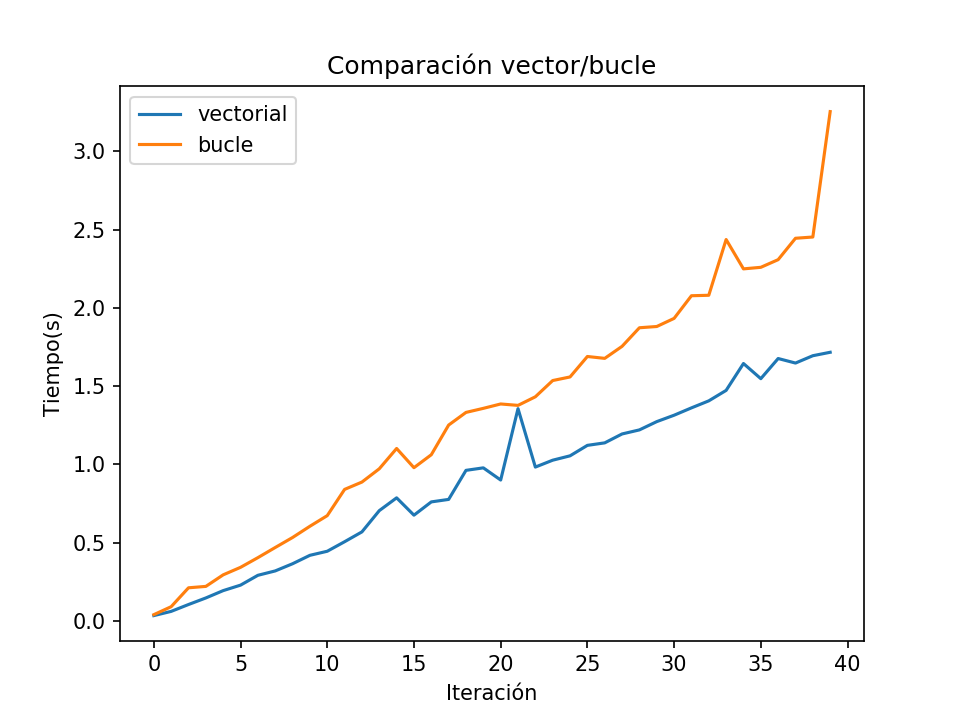

In [47]:
plt.figure()
# plot the linear data and the exponential data
plt.plot(t_vectorial)
plt.plot(t_bucle)
plt.xlabel('Iteración')
plt.ylabel('Tiempo(s)')
plt.title('Comparación vector/bucle')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['vectorial', 'bucle'])